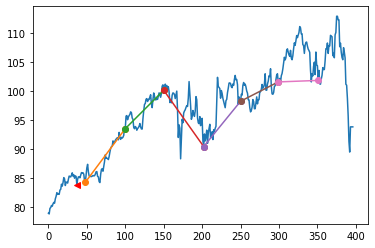

In [2]:
import scipy.optimize as sco
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

amex_df = pd.read_csv('../chapter4/gen/amex_df.csv',
                           parse_dates=True,
                           index_col=0)

# 继续使用TSLA收盘价格序列
amex_close = amex_df.close
# x = (0, 1, 2,...,len(tsla_close))
x = np.arange(0, amex_close.shape[0])
# y= 收盘价格numpy序列
y = amex_close.values
# interp1d线性插值函数
linear_interp = interp1d(x, y)
# 绘制插值
plt.plot(linear_interp(x))

# fminbound寻找给定范围内的最小值：在linear_inter中寻找全局最优范围1－504
global_min_pos = sco.fminbound(linear_interp, 1, 504)
# 绘制全局最优点，全局最小值点，r<：红色三角
plt.plot(global_min_pos, linear_interp(global_min_pos), 'r<')

# 每个单位都先画一个点，由两个点连成一条直线形成股价骨架图
last_postion = None
# 步长50，每50个单位求一次局部最小
for find_min_pos in np.arange(50, len(x), 50):
    # fmin_bfgs寻找给定值的局部最小值
    local_min_pos = sco.fmin_bfgs(linear_interp, find_min_pos, disp=0)
    # 形成最小点位置信息(x, y)
    draw_postion = (local_min_pos, linear_interp(local_min_pos))
    # 第一个50单位last_postion＝none, 之后都有值
    if last_postion is not None:
        # 将两两临近局部最小值相连，两个点连成一条直线
        plt.plot([last_postion[0][0], draw_postion[0][0]],
                 [last_postion[1][0], draw_postion[1][0]], 'o-')
    # 将这个步长单位内的最小值点赋予last_postion
    last_postion = draw_postion